/home/rishabh.mondal/miniconda3/envs/torch_space/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rishabh.mondal/miniconda3/envs/torch_space/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/50, Train Loss: 1.6043948531150818, Train Accuracy: 0.3206214689265537, Val Loss: 1.5166147947311401, Val Accuracy: 0.3050847457627119, Precision: 0.5585310734463278, Recall: 0.3050847457627119, F1 Score: 0.2368191702426587


Epoch 2/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 2/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2/50, Train Loss: 0.8293721377849579, Train Accuracy: 0.8757062146892656, Val Loss: 1.3592153787612915, Val Accuracy: 0.4463276836158192, Precision: 0.6679783190595582, Recall: 0.4463276836158192, F1 Score: 0.42721280202616885


Epoch 3/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 3/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3/50, Train Loss: 0.41677112877368927, Train Accuracy: 0.9194915254237288, Val Loss: 1.1330417394638062, Val Accuracy: 0.6497175141242938, Precision: 0.7434702908817408, Recall: 0.6497175141242938, F1 Score: 0.6431080689791842


Epoch 4/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 4/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4/50, Train Loss: 0.20295491814613342, Train Accuracy: 0.9533898305084746, Val Loss: 1.2336755990982056, Val Accuracy: 0.711864406779661, Precision: 0.8067774804849212, Recall: 0.711864406779661, F1 Score: 0.7069076327767903


Epoch 5/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 5/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5/50, Train Loss: 0.1050424613058567, Train Accuracy: 0.981638418079096, Val Loss: 1.6976197957992554, Val Accuracy: 0.6497175141242938, Precision: 0.8062560733242508, Recall: 0.6497175141242938, F1 Score: 0.6492925874624783


Epoch 6/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 6/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6/50, Train Loss: 0.05248260870575905, Train Accuracy: 0.9929378531073446, Val Loss: 2.1577537059783936, Val Accuracy: 0.6497175141242938, Precision: 0.8182656621388595, Recall: 0.6497175141242938, F1 Score: 0.6524424998570533


Epoch 7/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 7/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 7/50, Train Loss: 0.03512290958315134, Train Accuracy: 0.9943502824858758, Val Loss: 2.408412456512451, Val Accuracy: 0.6497175141242938, Precision: 0.81301282162658, Recall: 0.6497175141242938, F1 Score: 0.6525277504007646


Epoch 8/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 8/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 8/50, Train Loss: 0.030569241382181644, Train Accuracy: 0.9957627118644068, Val Loss: 2.6143598556518555, Val Accuracy: 0.655367231638418, Precision: 0.8218780588326207, Recall: 0.655367231638418, F1 Score: 0.6573050383933523


Epoch 9/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 9/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 9/50, Train Loss: 0.035726217553019524, Train Accuracy: 0.9915254237288136, Val Loss: 2.6082088947296143, Val Accuracy: 0.672316384180791, Precision: 0.8251884138951199, Recall: 0.672316384180791, F1 Score: 0.6764827499947721


Epoch 10/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 10/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 10/50, Train Loss: 0.041056341491639614, Train Accuracy: 0.9915254237288136, Val Loss: 2.4365034103393555, Val Accuracy: 0.6949152542372882, Precision: 0.8323159512522459, Recall: 0.6949152542372882, F1 Score: 0.7005402168939995


Epoch 11/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 11/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 11/50, Train Loss: 0.023964450228959322, Train Accuracy: 0.9915254237288136, Val Loss: 2.226369857788086, Val Accuracy: 0.7175141242937854, Precision: 0.8168018270106521, Recall: 0.7175141242937854, F1 Score: 0.7201256495149273


Epoch 12/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 12/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 12/50, Train Loss: 0.023950963746756315, Train Accuracy: 0.9957627118644068, Val Loss: 1.8948888778686523, Val Accuracy: 0.751412429378531, Precision: 0.8315392032336381, Recall: 0.751412429378531, F1 Score: 0.7560281689979552


Epoch 13/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 13/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 13/50, Train Loss: 0.021597869228571653, Train Accuracy: 0.9957627118644068, Val Loss: 1.5720447301864624, Val Accuracy: 0.768361581920904, Precision: 0.8272947391591458, Recall: 0.768361581920904, F1 Score: 0.7728799115349143


Epoch 14/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 14/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 14/50, Train Loss: 0.018052578903734684, Train Accuracy: 0.9957627118644068, Val Loss: 1.3369253873825073, Val Accuracy: 0.7853107344632768, Precision: 0.8182588458615218, Recall: 0.7853107344632768, F1 Score: 0.789161952157375


Epoch 15/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 15/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 15/50, Train Loss: 0.021703539416193962, Train Accuracy: 0.9929378531073446, Val Loss: 1.1803025007247925, Val Accuracy: 0.8305084745762712, Precision: 0.846164021164021, Recall: 0.8305084745762712, F1 Score: 0.8321958678985033


Epoch 16/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 16/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 16/50, Train Loss: 0.010725609841756523, Train Accuracy: 0.9943502824858758, Val Loss: 1.0844581127166748, Val Accuracy: 0.8418079096045198, Precision: 0.8474240680650825, Recall: 0.8418079096045198, F1 Score: 0.8415233312408452


Epoch 17/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 17/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 17/50, Train Loss: 0.015632986091077328, Train Accuracy: 0.9915254237288136, Val Loss: 1.001194953918457, Val Accuracy: 0.847457627118644, Precision: 0.851970982334769, Recall: 0.847457627118644, F1 Score: 0.8474203313668658


Epoch 18/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 18/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 18/50, Train Loss: 0.009243643144145608, Train Accuracy: 0.9957627118644068, Val Loss: 0.8863187432289124, Val Accuracy: 0.8531073446327684, Precision: 0.856816701587268, Recall: 0.8531073446327684, F1 Score: 0.8528378057108937


Epoch 19/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 19/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 19/50, Train Loss: 0.026557743549346924, Train Accuracy: 0.9929378531073446, Val Loss: 0.8811850547790527, Val Accuracy: 0.864406779661017, Precision: 0.8708178896312171, Recall: 0.864406779661017, F1 Score: 0.8634273891427671


Epoch 20/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 20/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 20/50, Train Loss: 0.012425665277987719, Train Accuracy: 0.9957627118644068, Val Loss: 0.9544978737831116, Val Accuracy: 0.8587570621468926, Precision: 0.8664550746486486, Recall: 0.8587570621468926, F1 Score: 0.8570796524916464


Epoch 21/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 21/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 21/50, Train Loss: 0.02187639195472002, Train Accuracy: 0.9943502824858758, Val Loss: 0.974240243434906, Val Accuracy: 0.8700564971751412, Precision: 0.8786272297236031, Recall: 0.8700564971751412, F1 Score: 0.8687691017348


Epoch 22/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 22/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 22/50, Train Loss: 0.012609041761606932, Train Accuracy: 0.9957627118644068, Val Loss: 0.9908350706100464, Val Accuracy: 0.8757062146892656, Precision: 0.8835560118586041, Recall: 0.8757062146892656, F1 Score: 0.8747993661291028


Epoch 23/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 23/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 23/50, Train Loss: 0.022797492798417807, Train Accuracy: 0.9943502824858758, Val Loss: 0.9167860746383667, Val Accuracy: 0.8700564971751412, Precision: 0.876912143004111, Recall: 0.8700564971751412, F1 Score: 0.8693045938769097


Epoch 24/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 24/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 24/50, Train Loss: 0.016691965982317924, Train Accuracy: 0.9943502824858758, Val Loss: 0.844091534614563, Val Accuracy: 0.8757062146892656, Precision: 0.8839513395713215, Recall: 0.8757062146892656, F1 Score: 0.8744063214682009


Epoch 25/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 25/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 25/50, Train Loss: 0.05296684056520462, Train Accuracy: 0.9915254237288136, Val Loss: 0.8182289600372314, Val Accuracy: 0.864406779661017, Precision: 0.8729612718606468, Recall: 0.864406779661017, F1 Score: 0.8625284937368832


Epoch 26/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 26/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 26/50, Train Loss: 0.016017817426472902, Train Accuracy: 0.9929378531073446, Val Loss: 0.8011152148246765, Val Accuracy: 0.8700564971751412, Precision: 0.8810700450589315, Recall: 0.8700564971751412, F1 Score: 0.8685564555262861


Epoch 27/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 27/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 27/50, Train Loss: 0.032971395179629326, Train Accuracy: 0.9872881355932204, Val Loss: 0.8092639446258545, Val Accuracy: 0.8813559322033898, Precision: 0.8916505421583186, Recall: 0.8813559322033898, F1 Score: 0.88096392115175


Epoch 28/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 28/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 28/50, Train Loss: 0.02218555100262165, Train Accuracy: 0.9915254237288136, Val Loss: 0.8763824105262756, Val Accuracy: 0.8757062146892656, Precision: 0.889573441440397, Recall: 0.8757062146892656, F1 Score: 0.8765923887560287


Epoch 29/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 29/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 29/50, Train Loss: 0.007624680874869227, Train Accuracy: 0.998587570621469, Val Loss: 0.9270567893981934, Val Accuracy: 0.864406779661017, Precision: 0.8764991975218439, Recall: 0.864406779661017, F1 Score: 0.8647500749589832


Epoch 30/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 30/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 30/50, Train Loss: 0.019874868914484978, Train Accuracy: 0.9957627118644068, Val Loss: 1.0008269548416138, Val Accuracy: 0.8531073446327684, Precision: 0.8636152363884063, Recall: 0.8531073446327684, F1 Score: 0.8541273682385232


Epoch 31/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 31/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 31/50, Train Loss: 0.026008611544966698, Train Accuracy: 0.9901129943502824, Val Loss: 1.0420583486557007, Val Accuracy: 0.8587570621468926, Precision: 0.867482088042147, Recall: 0.8587570621468926, F1 Score: 0.8592478575329965


Epoch 32/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 32/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 32/50, Train Loss: 0.0168053787201643, Train Accuracy: 0.9929378531073446, Val Loss: 1.0385152101516724, Val Accuracy: 0.8587570621468926, Precision: 0.867482088042147, Recall: 0.8587570621468926, F1 Score: 0.8592478575329965


Epoch 33/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 33/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 33/50, Train Loss: 0.02354153711348772, Train Accuracy: 0.9943502824858758, Val Loss: 1.0061389207839966, Val Accuracy: 0.864406779661017, Precision: 0.8703792032089748, Recall: 0.864406779661017, F1 Score: 0.8618554919869313


Epoch 34/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 34/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 34/50, Train Loss: 0.015669390093535185, Train Accuracy: 0.9943502824858758, Val Loss: 0.9816448092460632, Val Accuracy: 0.864406779661017, Precision: 0.8685916019054535, Recall: 0.864406779661017, F1 Score: 0.8616993412717083


Epoch 35/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 35/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 35/50, Train Loss: 0.020073345862329006, Train Accuracy: 0.9929378531073446, Val Loss: 0.9506961703300476, Val Accuracy: 0.864406779661017, Precision: 0.8671800625813362, Recall: 0.864406779661017, F1 Score: 0.8622124794083601


Epoch 36/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 36/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 36/50, Train Loss: 0.017726405058056116, Train Accuracy: 0.9943502824858758, Val Loss: 0.9274179935455322, Val Accuracy: 0.864406779661017, Precision: 0.8669706443522925, Recall: 0.864406779661017, F1 Score: 0.8614420863270948


Epoch 37/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 37/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 37/50, Train Loss: 0.011468927841633558, Train Accuracy: 0.9971751412429378, Val Loss: 0.8985742330551147, Val Accuracy: 0.864406779661017, Precision: 0.8700112907949538, Recall: 0.864406779661017, F1 Score: 0.8619713038118306


Epoch 38/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 38/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 38/50, Train Loss: 0.0282491622492671, Train Accuracy: 0.9901129943502824, Val Loss: 0.8683313727378845, Val Accuracy: 0.8813559322033898, Precision: 0.8869191662266225, Recall: 0.8813559322033898, F1 Score: 0.8809351314049877


Epoch 39/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 39/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 39/50, Train Loss: 0.01341665955260396, Train Accuracy: 0.9943502824858758, Val Loss: 0.8584770560264587, Val Accuracy: 0.8757062146892656, Precision: 0.8816217225393003, Recall: 0.8757062146892656, F1 Score: 0.8755093305940762


Epoch 40/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 40/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 40/50, Train Loss: 0.008047037525102496, Train Accuracy: 0.9971751412429378, Val Loss: 0.8672802448272705, Val Accuracy: 0.8813559322033898, Precision: 0.8880640385992749, Recall: 0.8813559322033898, F1 Score: 0.8812506737177169


Epoch 41/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 41/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 41/50, Train Loss: 0.02854473516345024, Train Accuracy: 0.9943502824858758, Val Loss: 0.8828443884849548, Val Accuracy: 0.8926553672316384, Precision: 0.8992780916509729, Recall: 0.8926553672316384, F1 Score: 0.8924927915889008


Epoch 42/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 42/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 42/50, Train Loss: 0.03240274451673031, Train Accuracy: 0.9915254237288136, Val Loss: 0.8629749417304993, Val Accuracy: 0.8870056497175142, Precision: 0.8979025082562297, Recall: 0.8870056497175142, F1 Score: 0.8872456241329152


Epoch 43/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 43/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 43/50, Train Loss: 0.0178182206582278, Train Accuracy: 0.9943502824858758, Val Loss: 0.8385697603225708, Val Accuracy: 0.8870056497175142, Precision: 0.8990542093419507, Recall: 0.8870056497175142, F1 Score: 0.8872997076376966


Epoch 44/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 44/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 44/50, Train Loss: 0.028130815364420414, Train Accuracy: 0.9929378531073446, Val Loss: 0.8627869486808777, Val Accuracy: 0.8926553672316384, Precision: 0.9054438656133572, Recall: 0.8926553672316384, F1 Score: 0.8921869848562486


Epoch 45/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 45/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 45/50, Train Loss: 0.013783840462565422, Train Accuracy: 0.9929378531073446, Val Loss: 0.982064962387085, Val Accuracy: 0.8813559322033898, Precision: 0.8944815385493352, Recall: 0.8813559322033898, F1 Score: 0.8816430206118324


Epoch 46/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 46/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 46/50, Train Loss: 0.011389852385036647, Train Accuracy: 0.9943502824858758, Val Loss: 1.0221954584121704, Val Accuracy: 0.8757062146892656, Precision: 0.8902104173290614, Recall: 0.8757062146892656, F1 Score: 0.8761645244089025


Epoch 47/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 47/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 47/50, Train Loss: 0.036108868196606636, Train Accuracy: 0.9943502824858758, Val Loss: 1.0084441900253296, Val Accuracy: 0.8870056497175142, Precision: 0.9009897196337874, Recall: 0.8870056497175142, F1 Score: 0.8871449476563669


Epoch 48/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 48/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 48/50, Train Loss: 0.022622140124440193, Train Accuracy: 0.9957627118644068, Val Loss: 0.9727246761322021, Val Accuracy: 0.8870056497175142, Precision: 0.9039092693979098, Recall: 0.8870056497175142, F1 Score: 0.887127715786456


Epoch 49/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 49/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 49/50, Train Loss: 0.01938172522932291, Train Accuracy: 0.9915254237288136, Val Loss: 0.9075409770011902, Val Accuracy: 0.8700564971751412, Precision: 0.8836872754471023, Recall: 0.8700564971751412, F1 Score: 0.8710883057555235


Epoch 50/50 - Training:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 50/50 - Validation:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 50/50, Train Loss: 0.02522044349461794, Train Accuracy: 0.9901129943502824, Val Loss: 0.8939850330352783, Val Accuracy: 0.8757062146892656, Precision: 0.8902791625124625, Recall: 0.8757062146892656, F1 Score: 0.8765069844882226


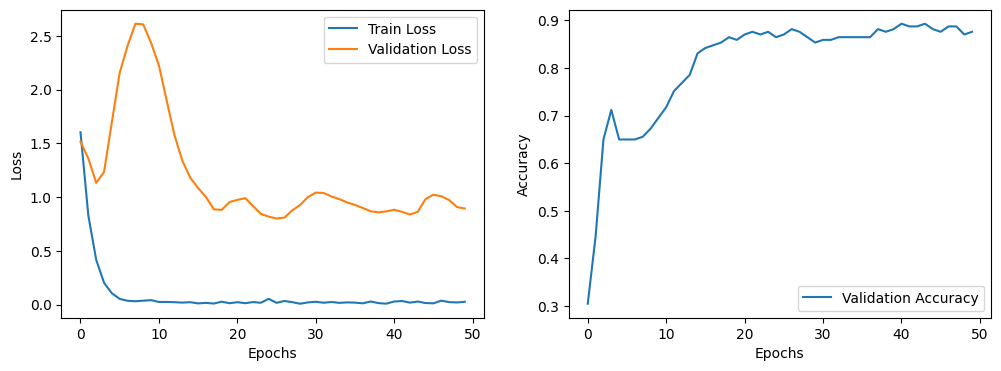

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models
from tqdm.notebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define the path to your dataset
path = r'/home/rishabh.mondal/R_P_project/Faulty_solar_panel'

# Define transformations to be applied to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Create the ImageFolder dataset
dataset = datasets.ImageFolder(root=path, transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024, shuffle=False)

# Define the EfficientNet model
model = models.efficientnet_b0(pretrained=True)
# Adjust the final fully connected layer to match the number of classes in your dataset
model.classifier[1] = nn.Linear(1280, len(dataset.classes))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Lists to store metrics for plotting
train_losses = []
val_losses = []
accuracies = []

# Training loop
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    total_correct = 0
    total_samples = 0
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Training'):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = total_correct / total_samples
    train_losses.append(train_loss)

    # Validation
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        all_predicted = []
        all_labels = []

        for images, labels in tqdm(val_loader, desc=f'Epoch {epoch + 1}/{num_epochs} - Validation'):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            val_loss += loss.item()

            all_predicted.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        val_losses.append(val_loss / len(val_loader))
        accuracy = correct / total
        accuracies.append(accuracy)

        # Calculate precision, recall, and F1 score
        precision = precision_score(all_labels, all_predicted, average='weighted')
        recall = recall_score(all_labels, all_predicted, average='weighted')
        f1 = f1_score(all_labels, all_predicted, average='weighted')

        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}, '
              f'Val Loss: {val_loss / len(val_loader)}, Val Accuracy: {accuracy}, '
              f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

# Plotting loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
